In [1]:
from tabulate import tabulate
from sklearn import preprocessing

In [2]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from progressbar import Percentage, ProgressBar,Bar,ETA

In [3]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
def getDataAndLabels(data_set, all_data):
    set_pids = list(data_set['PID'])
    data_set = all_data[all_data['PID'].isin(set_pids)]
    data = data_set[['PID','SID','TID','Token','Root','POS','AnnCorra','UD']].copy()
    labels = data_set.loc[data_set['POS'] == 'V_VM'][['VerbCategory']].copy()
    labels['VerbCategory'] = labels['VerbCategory'].fillna('na')
    labels= list(labels['VerbCategory'])
#     labels = list(map(lambda x: x.replace('t+', 't'), labels))
#     labels = list(map(lambda x: x.replace('t-', 't'), labels))
    return data, labels

In [10]:
def getFeatures(data):
    pids = list(data["PID"])
    ans = []
    verbs_dataset = []
    r = data['PID'].max()
    l = data['PID'].min()
    bar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()], maxval=r).start()
    for pid in range(l, r+1):
        if pid in pids:
            pdata = data.loc[data['PID']==pid]
            sr = int(pdata['SID'].max())
            sl = int(pdata['SID'].min())
            for sid in range(sl, sr+1):
                sdata = pdata.loc[pdata['SID']==sid]
                mv_idx = list(sdata.query('POS == "V_VM"')['TID'])
                c = sdata['TID'].max()
                lemma = list(sdata['Root'])
                pos = list(sdata['POS'])
                dep = list(sdata['UD'])
                for v in mv_idx:
                    feature = [lemma[v]]
                    ans.append(feature)
                    verbs_dataset.append(lemma[v])
        bar.update(pid)
    features = pd.DataFrame(ans,columns=['features'])
    print(features)
    return features, verbs_dataset

In [5]:
all_data = pd.read_csv('data/all-verb-cat-data.csv', delimiter='\t')
train_verbs_set = pd.read_csv('data/train-test-sets-hawp-3/train3.csv', delimiter='\t')
test_verbs_set = pd.read_csv('data/train-test-sets-hawp-3/test3.csv', delimiter='\t')

In [6]:
train_X, train_y = getDataAndLabels(train_verbs_set, all_data)
test_X, test_y = getDataAndLabels(test_verbs_set, all_data)

In [11]:
train_features, train_verbs = getFeatures(train_X)

     features
0        खरीद
1        खरीद
2          है
3          है
4         बता
...       ...
5200       है
5201    निकाल
5202       है
5203    निकाल
5204       था

[5205 rows x 1 columns]


In [14]:
test_features, test_verbs = getFeatures(test_X)

     features
0          भर
1          का
2          था
3          था
4          था
...       ...
1297     निपट
1298     छोड़
1299       था
1300       था
1301       है

[1302 rows x 1 columns]


In [16]:
all_verbs = list(train_features['features'])+list(test_features['features'])

In [17]:
all_labels= train_y + test_y

In [19]:
v_l = zip(all_verbs, all_labels)

In [22]:
df = pd.DataFrame(list(v_l),
               columns =['verb', 'cat'])

In [23]:
df

,verb,cat
0,खरीद,t+
1,खरीद,t+
2,है,0
3,है,0
4,बता,0
...,...,...
6502,निपट,+
6503,छोड़,-
6504,था,0
6505,था,0


In [24]:
df=df.drop_duplicates()

In [25]:
df

,verb,cat
0,खरीद,t+
2,है,0
4,बता,0
5,ख़रीद,t+
6,चाहिए,+
...,...,...
6190,खाई,+
6274,बुन्नू,na
6313,तोला,+
6377,गट्ठर,na


In [26]:
df2 = df.groupby(['cat'])['verb'].count()

In [27]:
df2

cat
+     115
-      53
0       7
na     37
t+      8
t-      8
Name: verb, dtype: int64

In [28]:
df3 = df.groupby(['cat'])

In [31]:
df3.get_group('t-')

,verb,cat
11,दे,t-
13,बेच,t-
111,बाँट,t-
115,उतर,t-
1538,उतार,t-
1674,सौंप,t-
2125,बह,t-
4178,बाँटा,t-


In [46]:
fake = [108, 53, 7, 13, 10]

In [47]:
cat = ['Positive', 'Nagative', 'Observation', 'Positive Transfer', 'Negative Transfer']

In [51]:
df_fake = pd.DataFrame(list(zip(cat, fake)),
               columns =['Category', 'Verb Count'])

In [52]:
df_fake

,Category,Verb Count
0,Positive,108
1,Nagative,53
2,Observation,7
3,Positive Transfer,13
4,Negative Transfer,10


NameError: name 'plt' is not defined

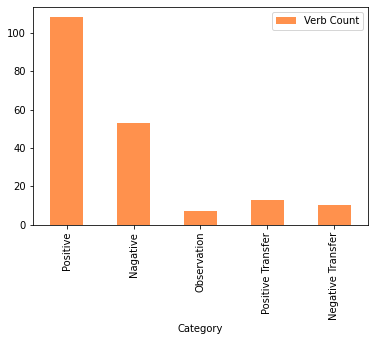

In [54]:
df_fake.plot(kind='bar',
        x='Category',
        y='Verb Count',
        color='#FF914D')
 
# set the title
plt.title('BarPlot')
 
# show the plot
plt.show()